<a href="https://colab.research.google.com/github/sonahyoung/class2022Spring/blob/main/sound_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital Signal Processing
> sampling rate(Hz), frequency(Hz), phasor

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

### Phasor (sine)

In [4]:
# parameter setting
amp = 1          # range [0.0, 1.0]   #amplitude, 진폭, 이게 1이라는 거면 제일 높은 게 1, 제일 낮은 게 -1이라는 거임.
sr = 10000       # sampling rate, Hz   #1초에 몇개 digitalize되어있느냐
dur = 0.5        # in seconds
freq = 200.0     # sine frequency, Hz   #1초에 몇번 왔다갔다하는 거냐
phase = 0  # phase, radian    #phase는 시작점을 말하는 거임.

In [5]:
# generate sample ticks   #sample tick은 sampling rate하고 관련이 있는거임, duration까지 등분해서 tick을 만들어주는 거임, 제일 처음에 오는 샘플을 1 이렇게 번호 붙이면 됨. 
#시험문제에는 이런 것들이 나온다. 쭉 순서를 매기는 데 0.5초에는 몇번이 붙음? 0.5초니까 5000이 되는거임
nSamp = sr * dur    #-> 5000개의 tick
samples = np.arange(1, nSamp+1)   #1부터 nSamp+1, 즉 5001을 뺀 5000번째까지 만들어짐.

In [6]:
# convert sample to time (sec)
t = samples/sr   #1/10000, 2/10000, .... 5000/10000 (초단위로 바뀜) -> sample tick이 time tick으로 바뀜

In [9]:
# convert time to angle (radian)   #sin 안에는 각도가 들어가야 함. 근데 그것도 radian으로 들어가야함
theta0 = t * 2*np.pi * freq    #angle tick으로 바꾸려면 반드시 frequency 정보가 필요함. 한 주기가 2ㅠ인데 그게 1초동안은 2ㅠ*freq만큼 있었을거임. 근데 1초가 아니니까 t를 곱해주는 거임.
#시험문제 생각해보면, len(samples)를 하면 몇개가 나오겠는가? 5000개일거임. t도 theta0도 마찬가지고 5000개일거임.

In [10]:
# shift angle by phase
theta = theta0 + phase

In [11]:
# generate signal by sin-phasor
s = amp * np.sin(theta)

Text(0, 0.5, 'real')

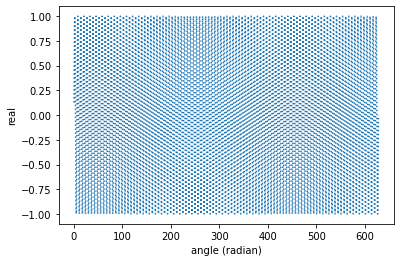

In [12]:
# plot the entire signal
plt.plot(theta, s, ':')
plt.xlabel('angle (radian)')
plt.ylabel('real')

In [ ]:
# plot a certain portion of signals
sampleRng = np.arange(0,100)
plt.plot(t[sampleRng], s[sampleRng], ':')
plt.xlabel('time (s)')
plt.ylabel('real')

In [ ]:
ipd.Audio(s, rate=sr)

In [ ]:
def phasor_sine(amp, sr, dur, freq, phase):
  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq + phase
  s = amp * np.sin(theta)
  return s, t, theta

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 110; phase = 0
s, t, theta = phasor_sine(amp, sr, dur, freq, phase)
ipd.Audio(s, rate=sr)

### Phasor (complex)

In [ ]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz
phase = 0  # phase, radian

In [ ]:
# generate sample ticks
nSamp = sr * dur
samples = np.arange(1, nSamp+1)

In [ ]:
# convert samples to time
t = samples/sr

In [ ]:
# convert time to angle in radian
theta0 = t * 2*np.pi * freq

In [ ]:
# shift angle by phase
theta = theta0 + phase

In [ ]:
# generate signal by complex-phasor
c = amp * np.exp(theta*1j)

In [ ]:
# plot the entire signal
import plotly.graph_objects as go
x, y, z = t, c.real, c.imag
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
                    xaxis_title='time (sec)',
                    yaxis_title='real',
                    zaxis_title='imag'))
fig.show()

In [ ]:
# plot a certain portion of signals
import plotly.graph_objects as go
sampleRng = np.arange(0,100)
x, y, z = t[sampleRng], c.real[sampleRng], c.imag[sampleRng]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
                    xaxis_title='time (sec)',
                    yaxis_title='real',
                    zaxis_title='imag'))
fig.show()

In [ ]:
ipd.Audio(c, rate=sr)

In [ ]:
def phasor_complex(amp, sr, dur, freq, phase):
  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq + phase
  c = amp * np.exp(theta*1j)
  return c, t, theta

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 440; phase = 0
c, t, theta = phasor_complex(amp, sr, dur, freq, phase)
ipd.Audio(c.real, rate=sr)